### 0. 환경설정

In [4]:
pip install deepchem

  Using cached deepchem-2.5.0-py3-none-any.whl.metadata (1.1 kB)
Using cached deepchem-2.5.0-py3-none-any.whl (552 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   --------------------------- ------------ 7.6/11.1 MB 36.2 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 36.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ------- -------------------------------- 8.7/44.5 MB 44.6 MB/s eta 0:00:01
   ------------ --------------------------- 13.4/44.5 MB 35.0 MB/s eta 0:00:01
   ------------------- -------------------- 21.8/44.5 MB 34.4 MB/s eta 0:00:01
   ------------------------ --------------- 27.5/44.5 MB 32.3 MB/s eta 0:00:01
   ------------------------------ --------- 33.6/44.5 MB 31.8 MB/s eta 0:00:01
   ----------------------------------- ---- 39.6/44.5 MB 31.1 MB/s eta 0:00:01
   ---------------------------------------  44.3/44.5 MB 31.0 MB/s eta 0:00:01
   -----------------------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\USER\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [7]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
# import deepchem
import pandas as pd
import numpy as np

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
import sklearn
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator

### 1. 파일 읽어들이기

In [10]:
Chembl_data = pd.read_csv("ChEMBL_LRRK2_IC50.csv")  #훈련용 데이터
Chembl_data

,Unnamed: 0,Smiles,pIC50
0,15,COc1ccc(OC)c(Sc2cc(C)c3nnc(-c4cnn(C)c4)n3n2)c1,4.500
1,16,COc1ccc(OC)c(C(O)c2ccc3nnc(-c4cnn(C)c4)n3n2)c1,5.040
2,17,COc1ccc(C(C)C)cc1Sc1ccc2nnc(-c3cnn(C)c3)n2n1,5.870
3,19,COc1ccc(OC)c(Sc2ccc3nnc(-c4cnccn4)n3n2)c1,6.060
4,20,COc1ccc(OC)c(Sc2ccc3nnc(-c4ccncc4)n3n2)c1,6.460
...,...,...,...
1421,685,c1cnc2c(-c3c[nH]c4ncnc(N5CCOCC5)c34)cnn2c1,7.185
1422,686,c1cncc(-c2c[nH]c3ncnc(N4CCOCC4)c23)c1,7.130
1423,687,c1cnn2c(-c3c[nH]c4ncnc(N5CCOCC5)c34)cnc2c1,8.055
1424,688,c1nc(N2CCOCC2)c2c(-c3cn[nH]c3)c[nH]c2n1,7.540


In [11]:
Chembl_data.describe()

,Unnamed: 0,pIC50
count,1426.000000,1426.000000
mean,782.274895,7.278293
std,660.397483,0.980570
min,0.000000,4.045000
25%,277.250000,6.745000
50%,563.000000,7.350000
75%,1250.750000,7.941250
max,2624.000000,10.190000


### 2. Molecular Descriptors

In [12]:
# Descriptor를 계산하는 함수를 불러오자. 
from rdkit.Chem.rdMolDescriptors import CalcExactMolWt, CalcCrippenDescriptors, CalcNumLipinskiHBA, CalcNumLipinskiHBD, CalcFractionCSP3, CalcNumRotatableBonds, CalcNumRings, CalcTPSA, CalcNumAromaticRings

# empty dictionary for pandas
properties = {"MW":[], "LogP":[], "HBA":[], "HBD": [], 
              "CSP3": [], "NumRotBond": [], "NumRings": [], "TPSA": [], 
              "NumAromaticRings": [], "pChEMBL": []} 

for idx, smiles in enumerate(Chembl_data["Smiles"]): # Smiles 열에서 반복.
    mol = Chem.MolFromSmiles(smiles)
    if mol == None: # 분자가 유효하지 않은 경우 생략
        continue
        
    properties["MW"].append(CalcExactMolWt(mol))
    properties["LogP"].append(CalcCrippenDescriptors(mol)[0])
    properties["HBA"].append(CalcNumLipinskiHBA(mol))
    properties["HBD"].append(CalcNumLipinskiHBD(mol))
    properties["CSP3"].append(CalcFractionCSP3(mol))
    properties["NumRotBond"].append(CalcNumRotatableBonds(mol))
    properties["NumRings"].append(CalcNumRings(mol))
    properties["TPSA"].append(CalcTPSA(mol))
    properties["NumAromaticRings"].append(CalcNumAromaticRings(mol))
    properties["pChEMBL"].append(Chembl_data["pIC50"].iloc[idx])  # pChEMBL 값 사용

In [13]:
properties

{'MW': [382.1211948160001,
  366.1440384360001,
  380.1419302600001,
  366.08989468800013,
  365.09464572000013,
  382.121194816,
  365.1600228480001,
  389.1600228480001,
  405.1913229760001,
  386.185509324,
  410.185509324,
  335.17461029200007,
  396.18740114400003,
  381.1513499840001,
  403.20082504000004,
  375.18075829200006,
  388.21239276800003,
  388.2123927680001,
  460.1692878800001,
  352.16477388,
  394.21172407200004,
  436.222288756,
  383.1957396600001,
  430.178709692,
  339.16952491200004,
  382.21172407200004,
  369.1800895960001,
  381.180089596,
  395.1670000480001,
  393.1371792280001,
  398.16666570000007,
  389.16633135200004,
  325.16510822800007,
  334.08883206800004,
  382.1211948160001,
  296.17494464,
  352.20115938799995,
  513.28522336,
  535.2695732960001,
  262.121846448,
  272.099729012,
  347.13822478400004,
  314.110293696,
  439.15552754800007,
  342.141593824,
  271.04000623999997,
  342.113505528,
  293.11642672,
  364.12594376000004,
  459.1285

In [14]:
property_data = pd.DataFrame(properties)

In [15]:
property_data

,MW,LogP,HBA,HBD,CSP3,NumRotBond,NumRings,TPSA,NumAromaticRings,pChEMBL
0,382.121195,3.00162,8,0,0.222222,5,4,79.36,4,4.500
1,366.144038,1.62370,9,1,0.222222,5,4,99.59,4,5.040
2,380.141930,3.80800,7,0,0.263158,5,4,70.13,4,5.870
3,366.089895,2.74970,8,0,0.117647,5,4,87.32,4,6.060
4,365.094646,3.35470,7,0,0.111111,5,4,74.43,4,6.460
...,...,...,...,...,...,...,...,...,...,...
1421,321.133808,1.50420,8,1,0.250000,2,5,84.23,4,7.185
1422,281.127660,1.85650,6,1,0.266667,2,4,66.93,3,7.130
1423,321.133808,1.50420,8,1,0.250000,2,5,84.23,4,8.055
1424,270.122909,1.18460,7,2,0.307692,2,4,82.72,3,7.540


In [16]:
#property_data 확인
property_data.describe() 

,MW,LogP,HBA,HBD,CSP3,NumRotBond,NumRings,TPSA,NumAromaticRings,pChEMBL
count,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000
mean,370.660386,3.134317,6.844320,1.490182,0.288085,3.858345,4.191445,82.110624,3.230715,7.278293
std,64.056196,0.991598,1.710533,0.892213,0.140048,1.562586,0.891573,19.954398,0.672828,0.980570
min,135.054495,-0.113300,2.000000,0.000000,0.000000,0.000000,2.000000,17.300000,0.000000,4.045000
25%,330.387777,2.511550,6.000000,1.000000,0.200000,3.000000,4.000000,68.600000,3.000000,6.745000
50%,375.180758,3.086500,7.000000,1.000000,0.300000,4.000000,4.000000,82.090000,3.000000,7.350000
75%,408.177567,3.737500,8.000000,2.000000,0.388889,5.000000,5.000000,95.750000,4.000000,7.941250
max,727.395836,6.329200,13.000000,6.000000,0.642857,16.000000,9.000000,164.780000,5.000000,10.190000


In [17]:
property_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MW                1426 non-null   float64
 1   LogP              1426 non-null   float64
 2   HBA               1426 non-null   int64  
 3   HBD               1426 non-null   int64  
 4   CSP3              1426 non-null   float64
 5   NumRotBond        1426 non-null   int64  
 6   NumRings          1426 non-null   int64  
 7   TPSA              1426 non-null   float64
 8   NumAromaticRings  1426 non-null   int64  
 9   pChEMBL           1426 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 111.5 KB


#### Feature와 Target 값 분리
* Feature : MW, LogP, HBA, HBD, CSP3, NumRotBond, NumRings, TPSA, NumAromaticRings
* Target : pChEMBL

In [18]:
X = property_data.iloc[:, :-1]  #전체 행, 마지막열 직전까지(0~8번 column)
y = property_data.iloc[:, -1]   #전체 행, 마지막 열(9번 column)

In [19]:
X

,MW,LogP,HBA,HBD,CSP3,NumRotBond,NumRings,TPSA,NumAromaticRings
0,382.121195,3.00162,8,0,0.222222,5,4,79.36,4
1,366.144038,1.62370,9,1,0.222222,5,4,99.59,4
2,380.141930,3.80800,7,0,0.263158,5,4,70.13,4
3,366.089895,2.74970,8,0,0.117647,5,4,87.32,4
4,365.094646,3.35470,7,0,0.111111,5,4,74.43,4
...,...,...,...,...,...,...,...,...,...
1421,321.133808,1.50420,8,1,0.250000,2,5,84.23,4
1422,281.127660,1.85650,6,1,0.266667,2,4,66.93,3
1423,321.133808,1.50420,8,1,0.250000,2,5,84.23,4
1424,270.122909,1.18460,7,2,0.307692,2,4,82.72,3


In [20]:
y

0       4.500
1       5.040
2       5.870
3       6.060
4       6.460
        ...  
1421    7.185
1422    7.130
1423    8.055
1424    7.540
1425    7.510
Name: pChEMBL, Length: 1426, dtype: float64

In [21]:
import sklearn.model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1, random_state=42)  #10%를 test set으로

In [22]:
X_train #학습용 데이터

,MW,LogP,HBA,HBD,CSP3,NumRotBond,NumRings,TPSA,NumAromaticRings
819,473.203619,1.20550,13,2,0.318182,4,6,142.87,4
381,326.185509,2.51170,7,2,0.470588,4,4,80.65,3
614,380.232460,3.33750,7,1,0.476190,5,4,70.17,3
261,388.176007,1.69880,9,1,0.250000,3,5,95.83,4
701,135.054495,-0.11330,5,3,0.000000,0,2,80.48,0
...,...,...,...,...,...,...,...,...,...
1095,437.228771,1.42070,11,4,0.523810,5,5,143.07,3
1130,265.121512,3.60264,4,2,0.125000,2,3,64.94,3
1294,367.143310,4.43228,6,2,0.136364,3,5,86.62,4
860,340.164774,2.33180,8,2,0.352941,5,4,88.19,3


In [23]:
X_test #평가용 데이터

,MW,LogP,HBA,HBD,CSP3,NumRotBond,NumRings,TPSA,NumAromaticRings
123,283.132077,2.99802,5,2,0.250000,3,3,67.01,2
1189,387.144373,2.76590,9,1,0.250000,3,5,116.75,4
462,409.176342,2.77310,9,1,0.181818,3,6,101.30,5
351,352.164774,1.69700,8,1,0.333333,4,4,87.24,3
1009,395.105210,3.36330,8,0,0.157895,6,4,83.66,4
...,...,...,...,...,...,...,...,...,...
367,426.162723,2.54680,9,2,0.444444,6,3,101.50,2
1408,293.127660,3.25029,6,1,0.187500,3,3,58.40,3
765,291.148396,3.32728,5,1,0.235294,3,3,66.53,3
792,358.160518,3.90830,5,1,0.368421,4,4,54.04,3


In [24]:
y_train

819     9.230
381     8.350
614     8.120
261     8.310
701     4.800
        ...  
1095    7.345
1130    4.790
1294    7.410
860     6.455
1126    6.825
Name: pChEMBL, Length: 1283, dtype: float64

In [25]:
y_test

123     8.920000
1189    6.953333
462     8.570000
351     7.430000
1009    6.770000
          ...   
367     7.770000
1408    7.570000
765     8.225000
792     7.180000
588     7.960000
Name: pChEMBL, Length: 143, dtype: float64

### Random Forest를 이용한 Regression prediction model training

In [26]:
import sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor

In [27]:
my_model = RandomForestRegressor()

In [28]:
my_model.fit(X_train, y_train)

RandomForestRegressor()

In [29]:
y_pred = my_model.predict(X_test)

In [30]:
y_pred

array([6.83043976, 7.2741758 , 7.25707083, 7.13873452, 5.777795  ,
       6.45789394, 6.97913917, 6.12364   , 6.03421333, 7.72520587,
       7.25119668, 6.09217992, 7.211375  , 8.17771667, 7.7220056 ,
       7.09125333, 7.68570603, 6.85461667, 6.446625  , 7.86193333,
       7.64751667, 5.64823333, 7.10158333, 8.04467   , 6.991275  ,
       7.05011675, 8.275525  , 7.19750179, 7.71691726, 7.35207778,
       7.798475  , 7.25856383, 7.49752194, 6.1884675 , 7.19579167,
       7.71691726, 7.55500833, 8.246225  , 6.97921413, 7.61973381,
       6.37868833, 7.02737833, 6.80495   , 7.03675   , 6.92643833,
       7.72899167, 7.92395   , 6.51675977, 6.79640486, 8.08537333,
       8.11431667, 8.17581333, 6.697295  , 8.17771667, 6.03054637,
       7.28246151, 7.86785333, 7.69017614, 7.04425   , 6.7606569 ,
       7.28529722, 6.94070375, 6.995125  , 7.82610833, 6.88925   ,
       7.39577333, 7.04702792, 7.00272083, 7.77634917, 7.54689833,
       6.98184583, 7.16016   , 7.20402   , 6.80495   , 5.75746

R² on test set: 0.31272575408160497


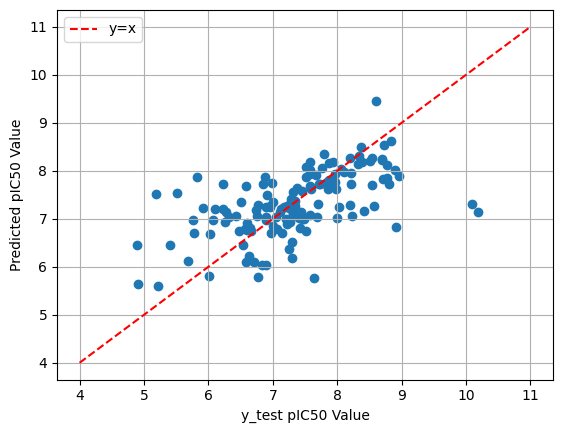

In [31]:
from sklearn.metrics import r2_score
#R2 값 계산
r2_my_model = r2_score(y_test, y_pred)
print(f"R² on test set: {r2_my_model}")

plt.scatter(y_test, y_pred)
plt.xlabel("y_test pIC50 Value")
plt.ylabel("Predicted pIC50 Value")
plt.grid()
plt.plot(range(4, 12), range(4, 12), "r--", label = "y=x")
plt.legend()

#### 오차 정량화 : MSE

In [32]:
from sklearn.metrics import r2_score
#R2 값 계산
r2_my_model = r2_score(y_test, y_pred)
print(f"R² on test set: {r2_my_model}")

R² on test set: 0.31272575408160497


In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
mse1 = mean_squared_error(y_test, y_pred)

In [35]:
print(mse1)

0.6099889762476256


In [36]:
def calculate_rmse(y_pred, y_test):
 
    # 차이 계산
    residuals = y_test - y_pred
    
    # 제곱 평균 계산 후 제곱근
    rmse = np.sqrt(np.mean(residuals ** 2))
    return rmse



rmse = calculate_rmse(y_pred, y_test)
print(f"RMSE: {rmse}")

RMSE: 0.7810179103244852


In [44]:
# 원래 pIC50의 분포
y.describe()

count    1426.000000
mean        7.278293
std         0.980570
min         4.045000
25%         6.745000
50%         7.350000
75%         7.941250
max        10.190000
Name: pChEMBL, dtype: float64

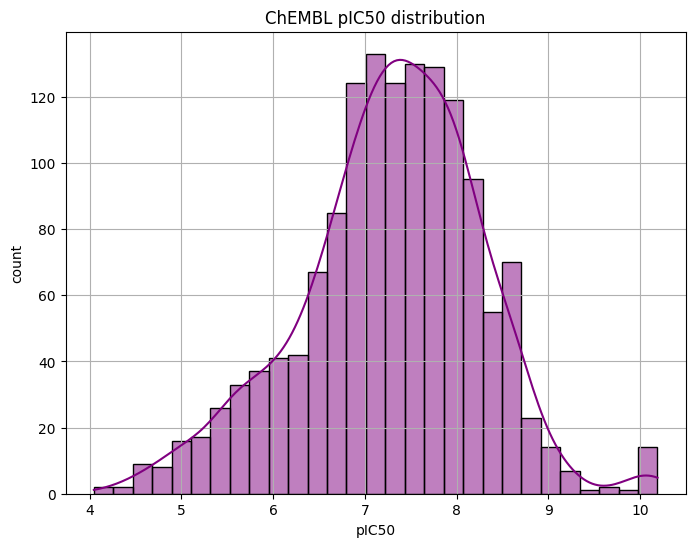

In [46]:
# 전체 ZINC 데이터에 대해 예측된 Binding Affinity 분포 확인
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True, color='purple')
plt.title('ChEMBL pIC50 distribution')
plt.xlabel('pIC50')
plt.ylabel('count')
plt.grid(True)
plt.show()

### Feature Importance 확인

In [37]:
# Feature importance 출력
importances = my_model.feature_importances_

In [38]:
importances

array([0.27687645, 0.1417666 , 0.039199  , 0.08449251, 0.23669181,
       0.04508815, 0.04683957, 0.09947964, 0.02956627])

In [39]:
feature_names = X_train.columns  # 입력 데이터의 특성 이름
feature_names

Index(['MW', 'LogP', 'HBA', 'HBD', 'CSP3', 'NumRotBond', 'NumRings', 'TPSA',
       'NumAromaticRings'],
      dtype='object')

            Feature  Importance
0                MW    0.276876
4              CSP3    0.236692
1              LogP    0.141767
7              TPSA    0.099480
3               HBD    0.084493
6          NumRings    0.046840
5        NumRotBond    0.045088
2               HBA    0.039199
8  NumAromaticRings    0.029566


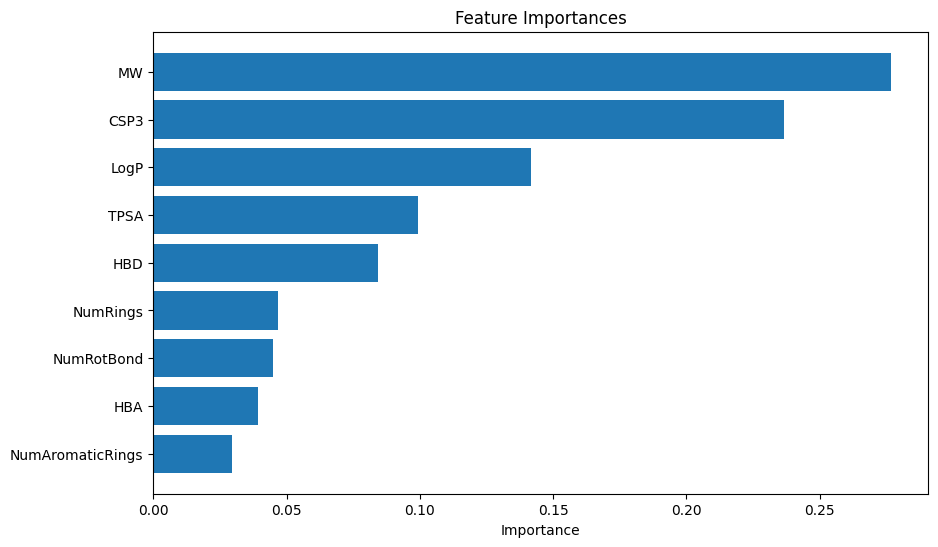

In [40]:
# Feature importance를 데이터프레임으로 보기 쉽게 정리
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Feature importance 출력
print(feature_importance_df)

# Feature importance 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()  # 가장 중요한 feature가 위에 오도록 뒤집기
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [41]:
X_train.describe()

,MW,LogP,HBA,HBD,CSP3,NumRotBond,NumRings,TPSA,NumAromaticRings
count,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000
mean,370.345790,3.131815,6.839439,1.485581,0.287473,3.856586,4.201871,82.054778,3.231489
std,64.805153,1.003182,1.716881,0.891319,0.140085,1.569406,0.901860,20.096511,0.671604
min,135.054495,-0.113300,2.000000,0.000000,0.000000,0.000000,2.000000,17.300000,0.000000
25%,329.138893,2.500900,6.000000,1.000000,0.200000,3.000000,4.000000,68.600000,3.000000
50%,375.158292,3.070120,7.000000,1.000000,0.300000,4.000000,4.000000,82.090000,3.000000
75%,407.661916,3.734840,8.000000,2.000000,0.388889,5.000000,5.000000,95.700000,4.000000
max,727.395836,6.329200,13.000000,6.000000,0.642857,16.000000,9.000000,164.780000,5.000000


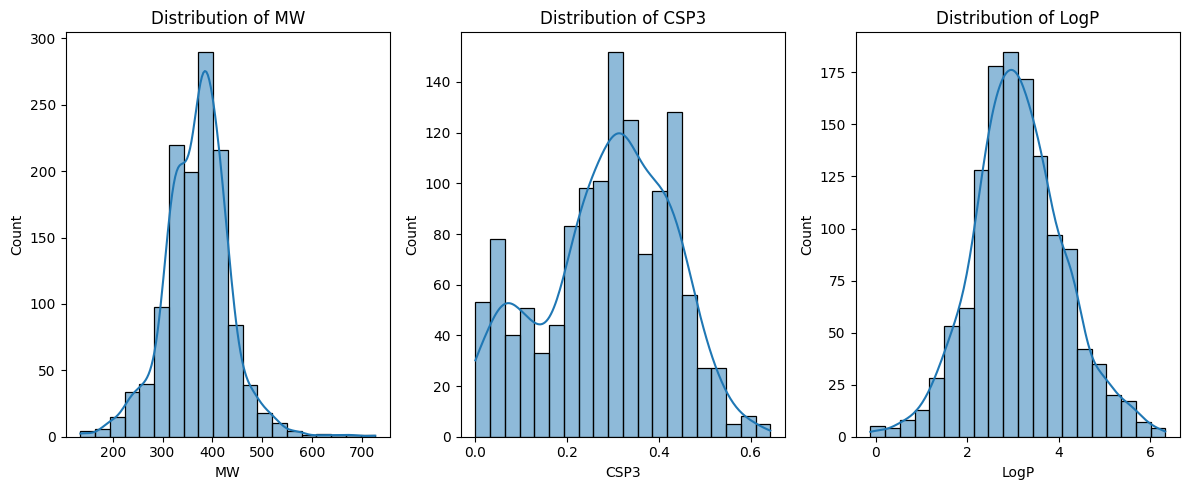

In [42]:
import seaborn as sns
# CSP3, MW, HBA의 분포를 확인
plt.figure(figsize=(12, 5))
for i, feature in enumerate(['MW','CSP3', 'LogP']):
    plt.subplot(1, 3, i+1)
    sns.histplot(X_train[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [43]:
# ZINC 데이터 로드
zinc_data = pd.read_csv("ZINC_compound_library.csv")  # SMILES 구조가 있는 ZINC 라이브러리 데이터

# 빈 특성 컬럼 생성
zinc_properties = {
    "MW": [], "LogP": [], "HBA": [], "HBD": [], 
    "CSP3": [], "NumRotBond": [], "NumRings": [], "TPSA": [], 
    "NumAromaticRings": []
}

# SMILES로부터 특성 계산
for idx, smiles in enumerate(zinc_data["smiles"]):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        zinc_properties["MW"].append(CalcExactMolWt(mol))
        zinc_properties["LogP"].append(CalcCrippenDescriptors(mol)[0])
        zinc_properties["HBA"].append(CalcNumLipinskiHBA(mol))
        zinc_properties["HBD"].append(CalcNumLipinskiHBD(mol))
        zinc_properties["CSP3"].append(CalcFractionCSP3(mol))
        zinc_properties["NumRotBond"].append(CalcNumRotatableBonds(mol))
        zinc_properties["NumRings"].append(CalcNumRings(mol))
        zinc_properties["TPSA"].append(CalcTPSA(mol))
        zinc_properties["NumAromaticRings"].append(CalcNumAromaticRings(mol))

# 특성 데이터를 데이터프레임으로 변환
zinc_features = pd.DataFrame(zinc_properties)

# 모델로 예측
zinc_predictions = my_model.predict(zinc_features)
zinc_data['Predicted_Affinity'] = zinc_predictions


KeyboardInterrupt: 

In [ ]:
zinc_data

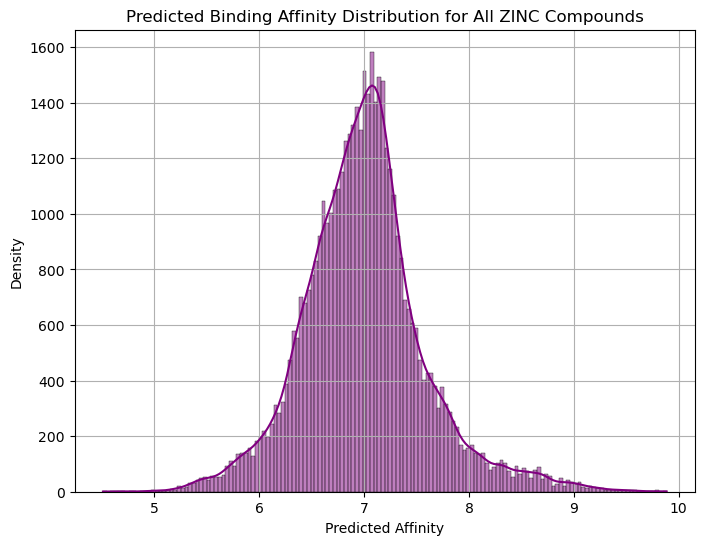

In [42]:
# 전체 ZINC 데이터에 대해 예측된 Binding Affinity 분포 확인
plt.figure(figsize=(8, 6))
sns.histplot(zinc_data['Predicted_Affinity'], kde=True, color='purple')
plt.title('Predicted Binding Affinity Distribution for All ZINC Compounds')
plt.xlabel('Predicted Affinity')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [43]:
zinc_data.describe()

,Predicted_Affinity
count,46542.000000
mean,7.000609
std,0.586618
min,4.508508
25%,6.646824
50%,6.989892
75%,7.284868
max,9.885650


#### 학습데이터와 유사한 데이터 확인

In [51]:

# Predicted_Affinity로 상위 100개 화합물 선택
top_100_candidates = zinc_data.nlargest(100, 'Predicted_Affinity')


In [52]:
top_100_candidates.describe()

,Predicted_Affinity
count,100.000000
mean,9.427215
std,0.177960
min,9.218125
25%,9.272133
50%,9.395159
75%,9.534898
max,9.885650


                                                  smiles  Predicted_Affinity
32318  C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@@H](Cc4ccc(Cl)c...            9.885650
32319  C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@H](Cc4ccc(Cl)c(...            9.885650
16854  O=C(NCC1(N2CCOCC2)CCCCC1)c1ccc2[nH]nc(-c3ccc(N...            9.872000
32388  C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@@H](Cc4ccc(Cl)c...            9.808950
32389  C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@H](Cc4ccc(Cl)cc...            9.808950
...                                                  ...                 ...
26838  CN(C)[C@@H]1CCC[C@H]1Nc1nc(Nc2ccc3c(c2)CN(C)S3...            9.222219
18456  CC1=C[C@]23C(=O)[C@@H](C=C(CO)[C@@H](O)[C@]2(O...            9.220572
1518   CN(C)C[C@@H](OC(=O)N1Cc2c(n[nH]c2NC(=O)C2(C(F)...            9.218600
32255  CC(C)NC[C@H](Cc1ccc(Cl)cc1)C(=O)N1CCN(c2ncnc3c...            9.218125
32312  CC(C)NC[C@@H](Cc1ccc(Cl)cc1)C(=O)N1CCN(c2ncnc3...            9.218125

[100 rows x 2 columns]


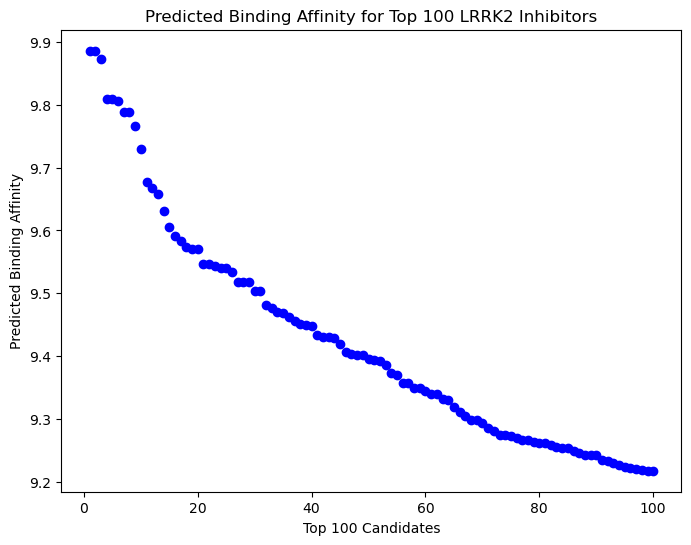

In [46]:

# 결과 확인
print(top_100_candidates[['smiles', 'Predicted_Affinity']])

# Scatter plot 그리기 (상위 100개 화합물)
plt.figure(figsize=(8, 6))
plt.scatter(range(1, 101), top_100_candidates['Predicted_Affinity'], color='blue')
plt.xlabel('Top 100 Candidates')
plt.ylabel('Predicted Binding Affinity')
plt.title('Predicted Binding Affinity for Top 100 LRRK2 Inhibitors')
plt.show()


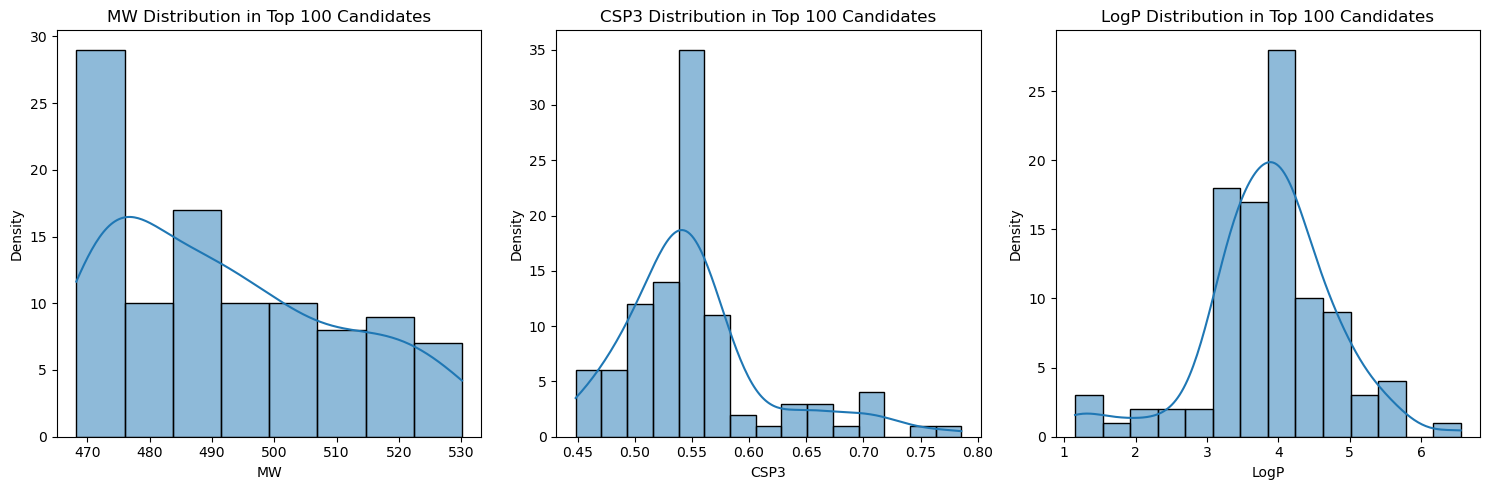

In [54]:
# top_100_candidates 원본을 건드리지 않도록 복사본 생성
top_100_features = top_100_candidates[['smiles', 'Predicted_Affinity']].copy()
top_100_features['CSP3'] = np.nan
top_100_features['MW'] = np.nan
top_100_features['LogP'] = np.nan

# 상위 100개의 SMILES로부터 특성 계산 (CSP3, MW, LogP)
for idx, smiles in enumerate(top_100_features['smiles']):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        top_100_features.at[idx, 'MW'] = CalcExactMolWt(mol)
        top_100_features.at[idx, 'CSP3'] = CalcFractionCSP3(mol)
        top_100_features.at[idx, 'LogP'] = CalcCrippenDescriptors(mol)[0]

# 각 특성에 대해 히스토그램 및 KDE 플롯 그리기
selected_features = top_100_features[['MW', 'CSP3', 'LogP']]

# 히스토그램 및 KDE 플롯
plt.figure(figsize=(15, 5))
for i, feature in enumerate(selected_features.columns, 1):
    plt.subplot(1, 3, i)  # 1행 3열 레이아웃
    sns.histplot(selected_features[feature].dropna(), kde=True)  # 결측치 제거 후 플롯 생성
    plt.title(f'{feature} Distribution in Top 100 Candidates')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [53]:
top_100_candidates

,zinc_id,smiles,Predicted_Affinity
32318,ZINC000066260034,C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@@H](Cc4ccc(Cl)c...,9.885650
32319,ZINC000066260035,C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@H](Cc4ccc(Cl)c(...,9.885650
16854,ZINC000299866759,O=C(NCC1(N2CCOCC2)CCCCC1)c1ccc2[nH]nc(-c3ccc(N...,9.872000
32388,ZINC000066058891,C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@@H](Cc4ccc(Cl)c...,9.808950
32389,ZINC000066058892,C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@H](Cc4ccc(Cl)cc...,9.808950
...,...,...,...
26838,ZINC000045496857,CN(C)[C@@H]1CCC[C@H]1Nc1nc(Nc2ccc3c(c2)CN(C)S3...,9.222219
18456,ZINC000103224669,CC1=C[C@]23C(=O)[C@@H](C=C(CO)[C@@H](O)[C@]2(O...,9.220572
1518,ZINC000084711574,CN(C)C[C@@H](OC(=O)N1Cc2c(n[nH]c2NC(=O)C2(C(F)...,9.218600
32255,ZINC000066252403,CC(C)NC[C@H](Cc1ccc(Cl)cc1)C(=O)N1CCN(c2ncnc3c...,9.218125


In [55]:
top_100_candidates.describe()

,Predicted_Affinity
count,100.000000
mean,9.427215
std,0.177960
min,9.218125
25%,9.272133
50%,9.395159
75%,9.534898
max,9.885650


In [56]:
# 후보물질들의 SMILES로부터 ECFP 생성하기
candidate_fingerprints = []
for smiles in top_100_candidates['smiles']:
    mol =  Chem.MolFromSmiles(smiles)                                  # SMILES -> Mol
    fpgen = AllChem.GetMorganGenerator(radius=3, fpSize=1024)          # Mol -> ECFP
    fp = fpgen.GetFingerprint(mol)
    candidate_fingerprints.append(fp)

# Training에 활용된 데이터의 SMILES로부터 ECFP 생성하기
trainset_fingerprints = []
for smiles in Chembl_data['Smiles']:
    mol = Chem.MolFromSmiles(smiles)                                   # SMILES -> Mol
    fpgen = AllChem.GetMorganGenerator(radius=3, fpSize=1024)          # Mol -> ECFP
    fp = fpgen.GetFingerprint(mol)
    trainset_fingerprints.append(fp)

In [57]:
# 유사도 계산 : DataStructs.TanimotoSimilarity(x, y)
from rdkit import DataStructs

sims = []                                                          # 각 후보물질의 유사도 최고값을 저장
for x in candidate_fingerprints:                                   # 후보물질(x)을 하나씩 불러옴
    max_similarity = -9999

    for y in trainset_fingerprints:                                # 학습 데이터(y)를 하나씩 불러옴
        similarity = DataStructs.TanimotoSimilarity(x, y)          # 후보물질과 학습 데이터의 Tanimoto 유사도 계산

        if max_similarity < similarity:                            # 기존의 유사도 최고값과 비교
            max_similarity = similarity

    sims.append(max_similarity)                                    # 가장 높은 유사도를 저장

In [58]:
# 유사도 최고값을 후보 물질 데이터프레임에 추가 
top_100_candidates["max_tanimoto_similarity"] = sims
top_100_candidates

,zinc_id,smiles,Predicted_Affinity,max_tanimoto_similarity
32318,ZINC000066260034,C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@@H](Cc4ccc(Cl)c...,9.885650,0.220588
32319,ZINC000066260035,C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@H](Cc4ccc(Cl)c(...,9.885650,0.220588
16854,ZINC000299866759,O=C(NCC1(N2CCOCC2)CCCCC1)c1ccc2[nH]nc(-c3ccc(N...,9.872000,0.358333
32388,ZINC000066058891,C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@@H](Cc4ccc(Cl)c...,9.808950,0.209677
32389,ZINC000066058892,C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@H](Cc4ccc(Cl)cc...,9.808950,0.209677
...,...,...,...,...
26838,ZINC000045496857,CN(C)[C@@H]1CCC[C@H]1Nc1nc(Nc2ccc3c(c2)CN(C)S3...,9.222219,0.306122
18456,ZINC000103224669,CC1=C[C@]23C(=O)[C@@H](C=C(CO)[C@@H](O)[C@]2(O...,9.220572,0.157895
1518,ZINC000084711574,CN(C)C[C@@H](OC(=O)N1Cc2c(n[nH]c2NC(=O)C2(C(F)...,9.218600,0.194631
32255,ZINC000066252403,CC(C)NC[C@H](Cc1ccc(Cl)cc1)C(=O)N1CCN(c2ncnc3c...,9.218125,0.217742


In [59]:
top_100_candidates.describe()

,Predicted_Affinity,max_tanimoto_similarity
count,100.000000,100.000000
mean,9.427215,0.232852
std,0.177960,0.065145
min,9.218125,0.136364
25%,9.272133,0.196940
50%,9.395159,0.217894
75%,9.534898,0.241375
max,9.885650,0.591304


In [60]:
# 유사도가 0.9보다 낮은 후보 물질만 가져오기
filtered_candidates = top_100_candidates[top_100_candidates.max_tanimoto_similarity<0.9].copy(deep=True)
filtered_candidates

,zinc_id,smiles,Predicted_Affinity,max_tanimoto_similarity
32318,ZINC000066260034,C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@@H](Cc4ccc(Cl)c...,9.885650,0.220588
32319,ZINC000066260035,C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@H](Cc4ccc(Cl)c(...,9.885650,0.220588
16854,ZINC000299866759,O=C(NCC1(N2CCOCC2)CCCCC1)c1ccc2[nH]nc(-c3ccc(N...,9.872000,0.358333
32388,ZINC000066058891,C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@@H](Cc4ccc(Cl)c...,9.808950,0.209677
32389,ZINC000066058892,C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@H](Cc4ccc(Cl)cc...,9.808950,0.209677
...,...,...,...,...
26838,ZINC000045496857,CN(C)[C@@H]1CCC[C@H]1Nc1nc(Nc2ccc3c(c2)CN(C)S3...,9.222219,0.306122
18456,ZINC000103224669,CC1=C[C@]23C(=O)[C@@H](C=C(CO)[C@@H](O)[C@]2(O...,9.220572,0.157895
1518,ZINC000084711574,CN(C)C[C@@H](OC(=O)N1Cc2c(n[nH]c2NC(=O)C2(C(F)...,9.218600,0.194631
32255,ZINC000066252403,CC(C)NC[C@H](Cc1ccc(Cl)cc1)C(=O)N1CCN(c2ncnc3c...,9.218125,0.217742


#### 후보물질 특성 평가
* QED : Quantitative Estimate of Drug-likeness
    * 값이 높을수록 drug-likeness가 높음
* SA Score : Synthetic Accessiability Score
    * 값이 높을수록 합성하기 어려움  
 

In [61]:
# QED 계산
from rdkit.Chem import QED

qed_list = []

for smiles in filtered_candidates["smiles"]:
    mol = Chem.MolFromSmiles(smiles)
    qed = QED.default(mol)     # QED 계산하기
    qed_list.append(qed)
    print(f"QED: {qed:.5f}")

QED: 0.66145
QED: 0.66145
QED: 0.53214
QED: 0.68104
QED: 0.68104
QED: 0.62687
QED: 0.68799
QED: 0.68799
QED: 0.66719
QED: 0.65858
QED: 0.61485
QED: 0.64420
QED: 0.54825
QED: 0.51125
QED: 0.63741
QED: 0.57718
QED: 0.58476
QED: 0.63304
QED: 0.67660
QED: 0.67536
QED: 0.61511
QED: 0.61511
QED: 0.58209
QED: 0.51796
QED: 0.57246
QED: 0.69532
QED: 0.45847
QED: 0.65194
QED: 0.65194
QED: 0.70512
QED: 0.61478
QED: 0.40644
QED: 0.63114
QED: 0.51239
QED: 0.47979
QED: 0.61237
QED: 0.51989
QED: 0.54000
QED: 0.51111
QED: 0.49044
QED: 0.52258
QED: 0.49383
QED: 0.49383
QED: 0.60838
QED: 0.61517
QED: 0.51264
QED: 0.55735
QED: 0.62892
QED: 0.62892
QED: 0.35929
QED: 0.33786
QED: 0.57827
QED: 0.42997
QED: 0.49030
QED: 0.61043
QED: 0.57444
QED: 0.59879
QED: 0.55527
QED: 0.43152
QED: 0.59305
QED: 0.61873
QED: 0.71499
QED: 0.44670
QED: 0.27355
QED: 0.47815
QED: 0.45763
QED: 0.56929
QED: 0.44107
QED: 0.44107
QED: 0.45309
QED: 0.56995
QED: 0.61536
QED: 0.50864
QED: 0.50864
QED: 0.56564
QED: 0.49926
QED: 0.49464

In [62]:
#SA Score 계산
import sys
import os
from rdkit.Chem import RDConfig
sys.path.append(os.path.join(RDConfig.RDContribDir, "SA_Score"))
import sascorer

sa_list = []

for smiles in filtered_candidates["smiles"]:
    mol = Chem.MolFromSmiles(smiles)
    sa_score = sascorer.calculateScore(mol)     # SA score 계산하기
    sa_list.append(sa_score)
    print(f"SA score: {sa_score:.5f}")

[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerat

SA score: 3.84583
SA score: 3.84583
SA score: 2.73120
SA score: 3.64140
SA score: 3.64140
SA score: 3.64757
SA score: 3.77996
SA score: 3.77996
SA score: 3.74696
SA score: 3.71463
SA score: 2.90278
SA score: 4.76712
SA score: 2.97357
SA score: 2.90811
SA score: 3.76248
SA score: 3.94736
SA score: 2.37313
SA score: 2.84811
SA score: 3.70618
SA score: 3.77275
SA score: 3.46742
SA score: 3.46742
SA score: 3.00538
SA score: 2.78889
SA score: 3.06715
SA score: 3.71224
SA score: 2.80043
SA score: 3.76995
SA score: 3.76995
SA score: 4.03582
SA score: 2.74195
SA score: 2.93631
SA score: 3.74641
SA score: 2.78982
SA score: 3.60725
SA score: 2.94906
SA score: 2.74307
SA score: 3.02560
SA score: 2.87991
SA score: 6.16040
SA score: 3.48547
SA score: 4.34682
SA score: 4.34843
SA score: 3.86609
SA score: 3.04383
SA score: 3.18505
SA score: 2.75754
SA score: 3.42307
SA score: 3.42307
SA score: 3.08159
SA score: 6.10185
SA score: 2.63615
SA score: 6.22772
SA score: 3.59531
SA score: 3.07915
SA score: 

[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator
[00:15:03] DEPRECATION WARNING: please use MorganGenerator


In [63]:
# 데이터프레임에 QED와 SA Score 추가
filtered_candidates['QED'] = qed_list
filtered_candidates['SA'] = sa_list
filtered_candidates

,zinc_id,smiles,Predicted_Affinity,max_tanimoto_similarity,QED,SA
32318,ZINC000066260034,C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@@H](Cc4ccc(Cl)c...,9.885650,0.220588,0.661453,3.845830
32319,ZINC000066260035,C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@H](Cc4ccc(Cl)c(...,9.885650,0.220588,0.661453,3.845830
16854,ZINC000299866759,O=C(NCC1(N2CCOCC2)CCCCC1)c1ccc2[nH]nc(-c3ccc(N...,9.872000,0.358333,0.532140,2.731202
32388,ZINC000066058891,C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@@H](Cc4ccc(Cl)c...,9.808950,0.209677,0.681040,3.641400
32389,ZINC000066058892,C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@H](Cc4ccc(Cl)cc...,9.808950,0.209677,0.681040,3.641400
...,...,...,...,...,...,...
26838,ZINC000045496857,CN(C)[C@@H]1CCC[C@H]1Nc1nc(Nc2ccc3c(c2)CN(C)S3...,9.222219,0.306122,0.693259,3.853864
18456,ZINC000103224669,CC1=C[C@]23C(=O)[C@@H](C=C(CO)[C@@H](O)[C@]2(O...,9.220572,0.157895,0.410791,6.022396
1518,ZINC000084711574,CN(C)C[C@@H](OC(=O)N1Cc2c(n[nH]c2NC(=O)C2(C(F)...,9.218600,0.194631,0.648861,3.900304
32255,ZINC000066252403,CC(C)NC[C@H](Cc1ccc(Cl)cc1)C(=O)N1CCN(c2ncnc3c...,9.218125,0.217742,0.656722,3.512990


In [64]:
filtered_candidates.describe()

,Predicted_Affinity,max_tanimoto_similarity,QED,SA
count,100.000000,100.000000,100.000000,100.000000
mean,9.427215,0.232852,0.558814,3.723866
std,0.177960,0.065145,0.093207,0.984567
min,9.218125,0.136364,0.273545,2.373130
25%,9.272133,0.196940,0.493833,2.978918
50%,9.395159,0.217894,0.573454,3.624324
75%,9.534898,0.241375,0.629781,3.847838
max,9.885650,0.591304,0.714991,6.462151


In [65]:
# 원하는 조건으로 데이터프레임을 필터링 한 후 상위 10개만큼 가져오기

cond1 = filtered_candidates['QED'] > 0.4
cond2 = filtered_candidates['SA'] < 4.0
my_candidates2 = filtered_candidates[cond1 & cond2].head(10).copy(deep=True)
my_candidates2

,zinc_id,smiles,Predicted_Affinity,max_tanimoto_similarity,QED,SA
32318,ZINC000066260034,C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@@H](Cc4ccc(Cl)c...,9.88565,0.220588,0.661453,3.845830
32319,ZINC000066260035,C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@H](Cc4ccc(Cl)c(...,9.88565,0.220588,0.661453,3.845830
16854,ZINC000299866759,O=C(NCC1(N2CCOCC2)CCCCC1)c1ccc2[nH]nc(-c3ccc(N...,9.87200,0.358333,0.532140,2.731202
32388,ZINC000066058891,C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@@H](Cc4ccc(Cl)c...,9.80895,0.209677,0.681040,3.641400
32389,ZINC000066058892,C[C@@H]1SCc2ncnc(N3CCN(C(=O)[C@H](Cc4ccc(Cl)cc...,9.80895,0.209677,0.681040,3.641400
20076,ZINC000095580355,C[C@@H]1C[C@@H](O)c2ncnc(N3CCN(C(=O)[C@H](CNC4...,9.80610,0.233871,0.626865,3.647569
32526,ZINC000066261947,C[C@@H]1OCc2ncnc(N3CCN(C(=O)[C@@H](Cc4ccc(Cl)c...,9.78810,0.196970,0.687991,3.779959
32527,ZINC000066261949,C[C@@H]1OCc2ncnc(N3CCN(C(=O)[C@H](Cc4ccc(Cl)c(...,9.78810,0.196970,0.687991,3.779959
20075,ZINC000095578545,CC(C)NC[C@@H](C(=O)N1CCN(c2ncnc3c2[C@H](C)C[C@...,9.76590,0.218045,0.667186,3.746955
2558,ZINC000169325511,CN1CCN(C[C@@H](NC(=O)C[C@H]2CNC(=O)c3cc(-c4ccc...,9.72990,0.210938,0.658575,3.714633


In [66]:
my_candidates2.to_csv("my_final.csv", index=False)